In [8]:
#balldrop.ipynb
#Author: Kyle Larson
#purpose, demonstrate that there is acceleration due to gravity and practice scatterplotts
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = {'height':[], 'time':[]}
data['height'] = [205.74,205.74,205.74,205.74,205.74,205.74,
                  287.02, 287.02, 287.02, 287.02, 287.02, 287.02, 
                 246.38,246.38,246.38,246.38,246.38,246.38,
                 190.5,190.5,190.5,190.5,190.5,190.5]
data['time'] =[ .61,.57,.72,.74,.65,.68,
               .55,.72,.55,.85,.72,.85,
               .84,.74,.65,.76,.62,.67,
               .64,.70,.64,.59,.64,.48,  ]
fall_data = pd.DataFrame(data)
fall_data.head()

,height,time
0,205.74,0.61
1,205.74,0.57
2,205.74,0.72
3,205.74,0.74
4,205.74,0.65


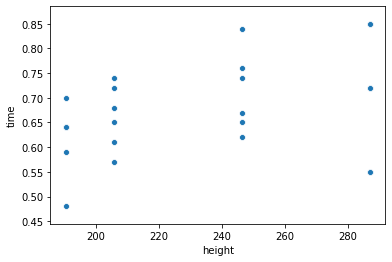

In [9]:
sns.scatterplot(x=fall_data['height'], y=fall_data['time'] )

In [10]:
means = [ statistics.mean(data['time'][0:6]), statistics.mean(data['time'][6:11]), 
         statistics.mean(data['time'][12:18]), statistics.mean(data['time'][18:23])]
print(means)
print(str(statistics.mean(means[1:3]))+" at "+str(statistics.mean([data['height'][0],data['height'][13]])))


[0.6616666666666666, 0.678, 0.7133333333333334, 0.642]
0.6956666666666667 at 226.06


In [30]:
prediction = {'height':[],'time':[]}
for n in range(190, 287):
    prediction['height'].append(n)
    #prediction['time'].append()

In [31]:
print(prediction)

{'height': [190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286], 'time': []}


In [35]:
def quadreg(p1, p2, p3):
    y1, y2, y3=p1[1], p2[1], p3[1]
    x1, x2, x3=p1[0], p2[0], p3[0]
    zeta = y2-y1*x2**2/x1**2
    phi=(1-x3**2/x1**2)+(-x3+x3**2/x1)*(1-x2**2/x1**2)/(x2-x2**2/x1)
    psi=(y3-y1*x3**2/x1**2)+(-x3+x3*2/x1)*zeta/(x2-x2**2/x1)
    c=psi/phi
    
    b=(zeta-(1-x2**2/x1**2)*c)/(x2-x2**2/x1)
    a=(y1-c-x1*b)/x1**2
    return [a, b, c]
xmid =statistics.mean([data['height'][0],data['height'][13]])
print(xmid)
ymid =statistics.mean(means[1:3])
print(ymid)
p1 = [data['height'][0], means[0]]
p2 = [data['height'][len(data['height'])-1], means[len(means)-1]]
quad_coef= quadreg(p1, [xmid,ymid], p2)
print(quad_coef)

226.06
0.6956666666666667
[-0.0014772184914595681, 0.6395361729586986, -68.38740143911288]


In [33]:
def quad(qc, x):
    y = qc[0]*x**2+qc[1]*x+qc[2]
    return y
prediction['time'] = []
for n in range(190, 287):
    prediction['time'].append(quad(quad_coef,n))

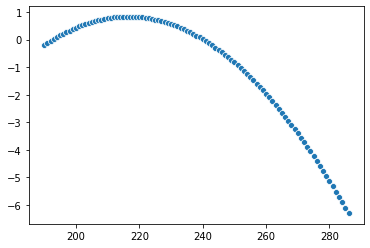

In [34]:
sns.scatterplot(x=prediction['height'], y=prediction['time'] )